# Hierarchical Clustering

## Libraries Loading

In [1]:
library(tidyverse)
library(ggplot2)
library(cluster)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data loading

In [2]:
data <- read_csv('../00_data/Mall_Customers.csv')
head(data)

Rows: 200 Columns: 5
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): CustomerID, Genre
dbl (3): Age, Annual Income (k$), Spending Score (1-100)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
<chr>,<chr>,<dbl>,<dbl>,<dbl>
0001,Male,19,15,39
0002,Male,21,15,81
0003,Female,20,16,6
0004,Female,23,16,77
0005,Female,31,17,40
0006,Female,22,17,76


In [3]:
# data structure
glimpse(data)

Rows: 200
Columns: 5
$ CustomerID               <chr> "0001", "0002", "0003", "0004", "0005", "0006…
$ Genre                    <chr> "Male", "Male", "Female", "Female", "Female",…
$ Age                      <dbl> 19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 3…
$ `Annual Income (k$)`     <dbl> 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 1…
$ `Spending Score (1-100)` <dbl> 39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, …


## Features

In [4]:
set.seed(123)

X <- data |> select(`Annual Income (k$)`, `Spending Score (1-100)`)
head(X)

Annual Income (k$),Spending Score (1-100)
<dbl>,<dbl>
15,39
15,81
16,6
16,77
17,40
17,76


## Feature scaling

In [5]:
X_scaled <- scale(X)
head(X_scaled)

Annual Income (k$),Spending Score (1-100)
-1.734646,-0.4337131
-1.734646,1.1927111
-1.696572,-1.7116178
-1.696572,1.0378135
-1.658498,-0.3949887
-1.658498,0.9990891


## Find the optimal number of clusters

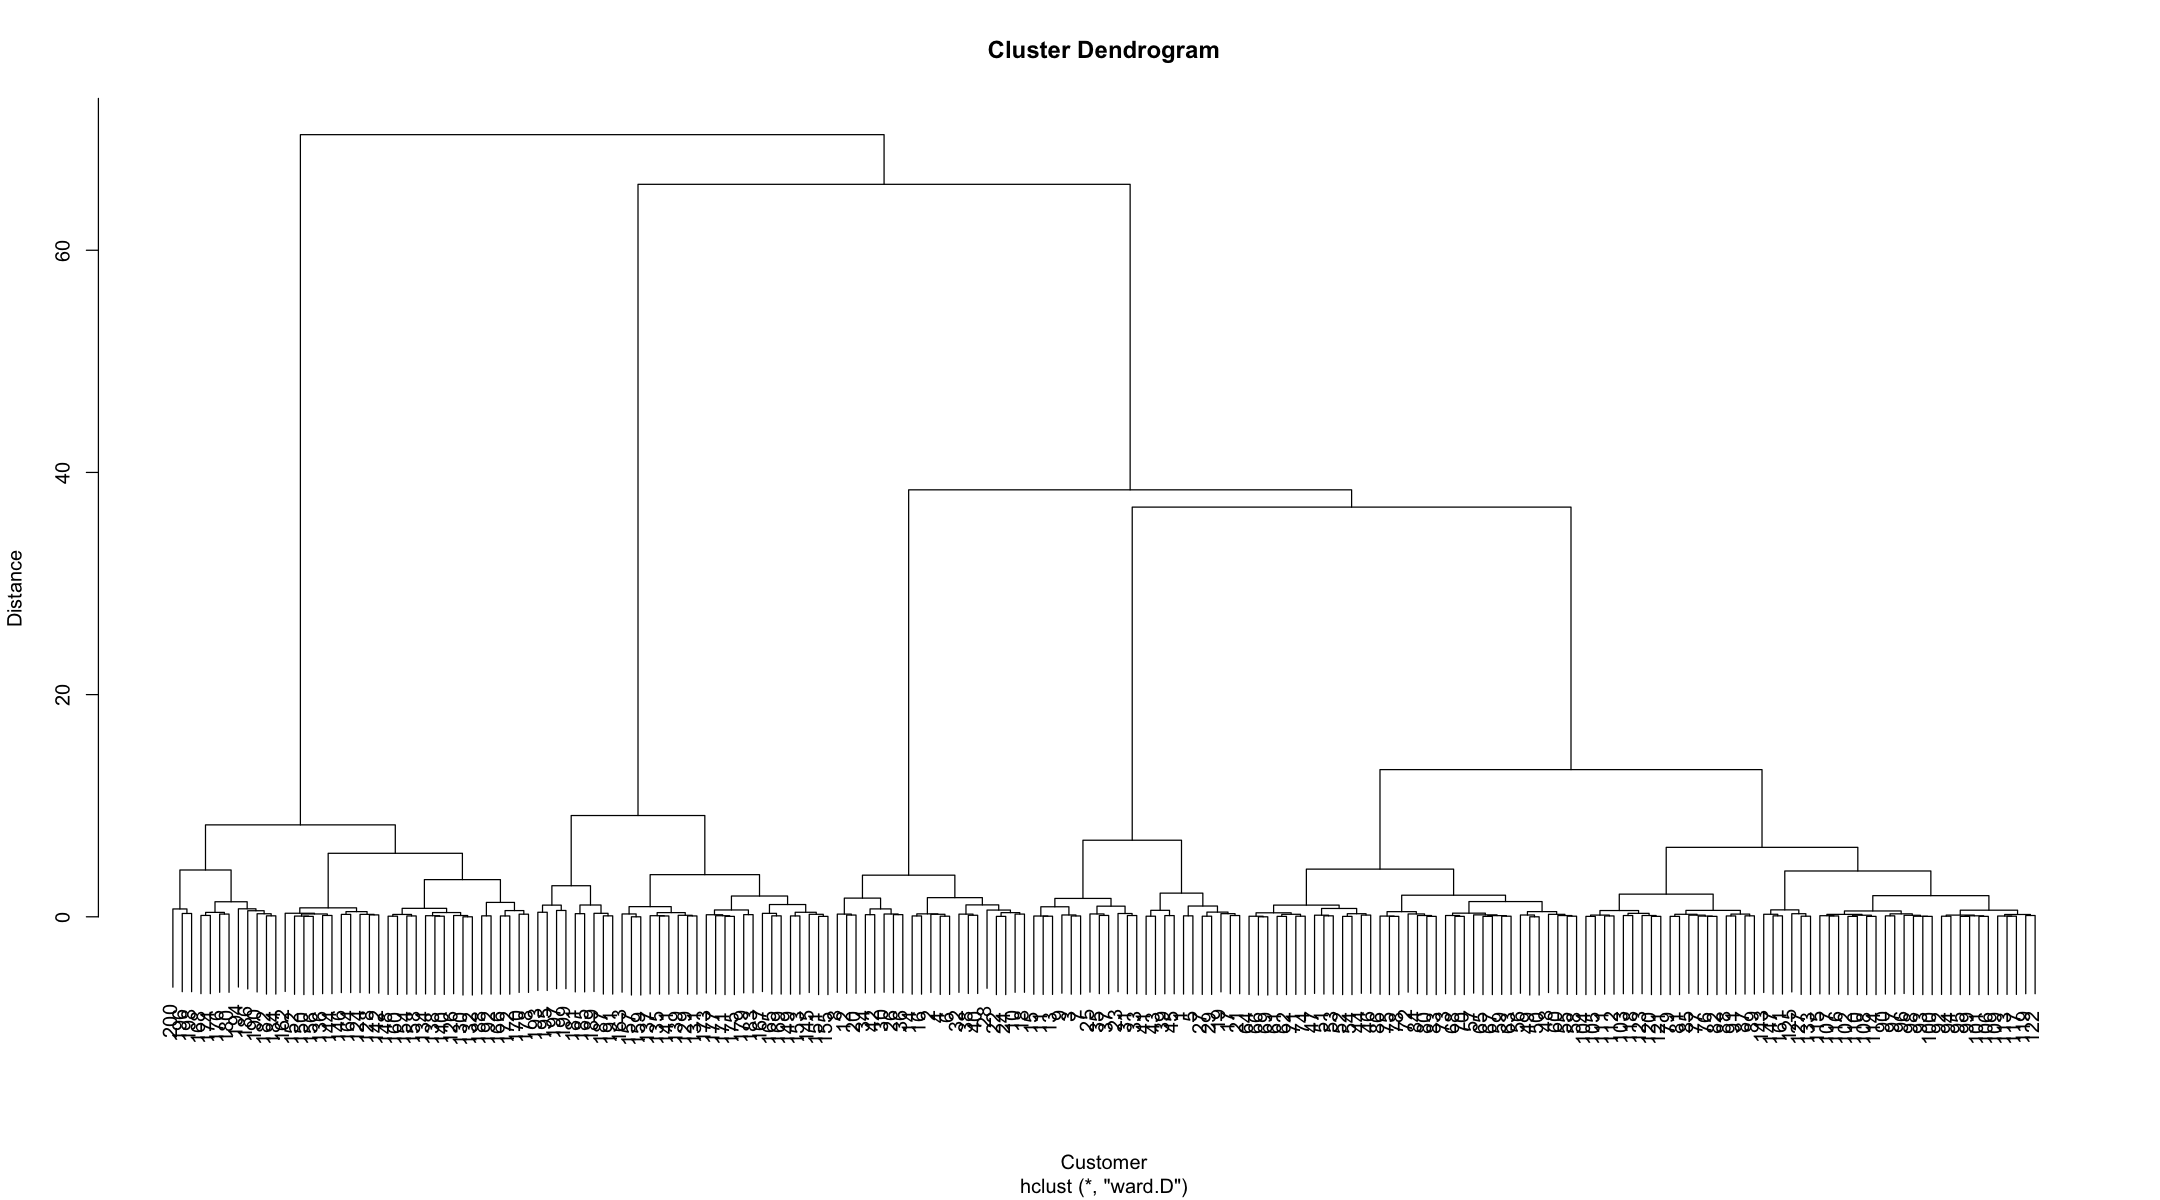

In [6]:
distance_matrix <- dist(X_scaled, method = 'euclidean')
clust <- hclust(distance_matrix, method = 'ward.D')

options(repr.plot.width=18, repr.plot.height=10)

plot(clust, labels = NULL, hang = 0.1, check = TRUE,
     axes = TRUE, frame.plot = FALSE, ann = TRUE,
     main = "Cluster Dendrogram",
     sub = NULL, xlab = "Customer", ylab = "Distance")

Optimal threshold: 38.43337 
Cluster assignments: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 


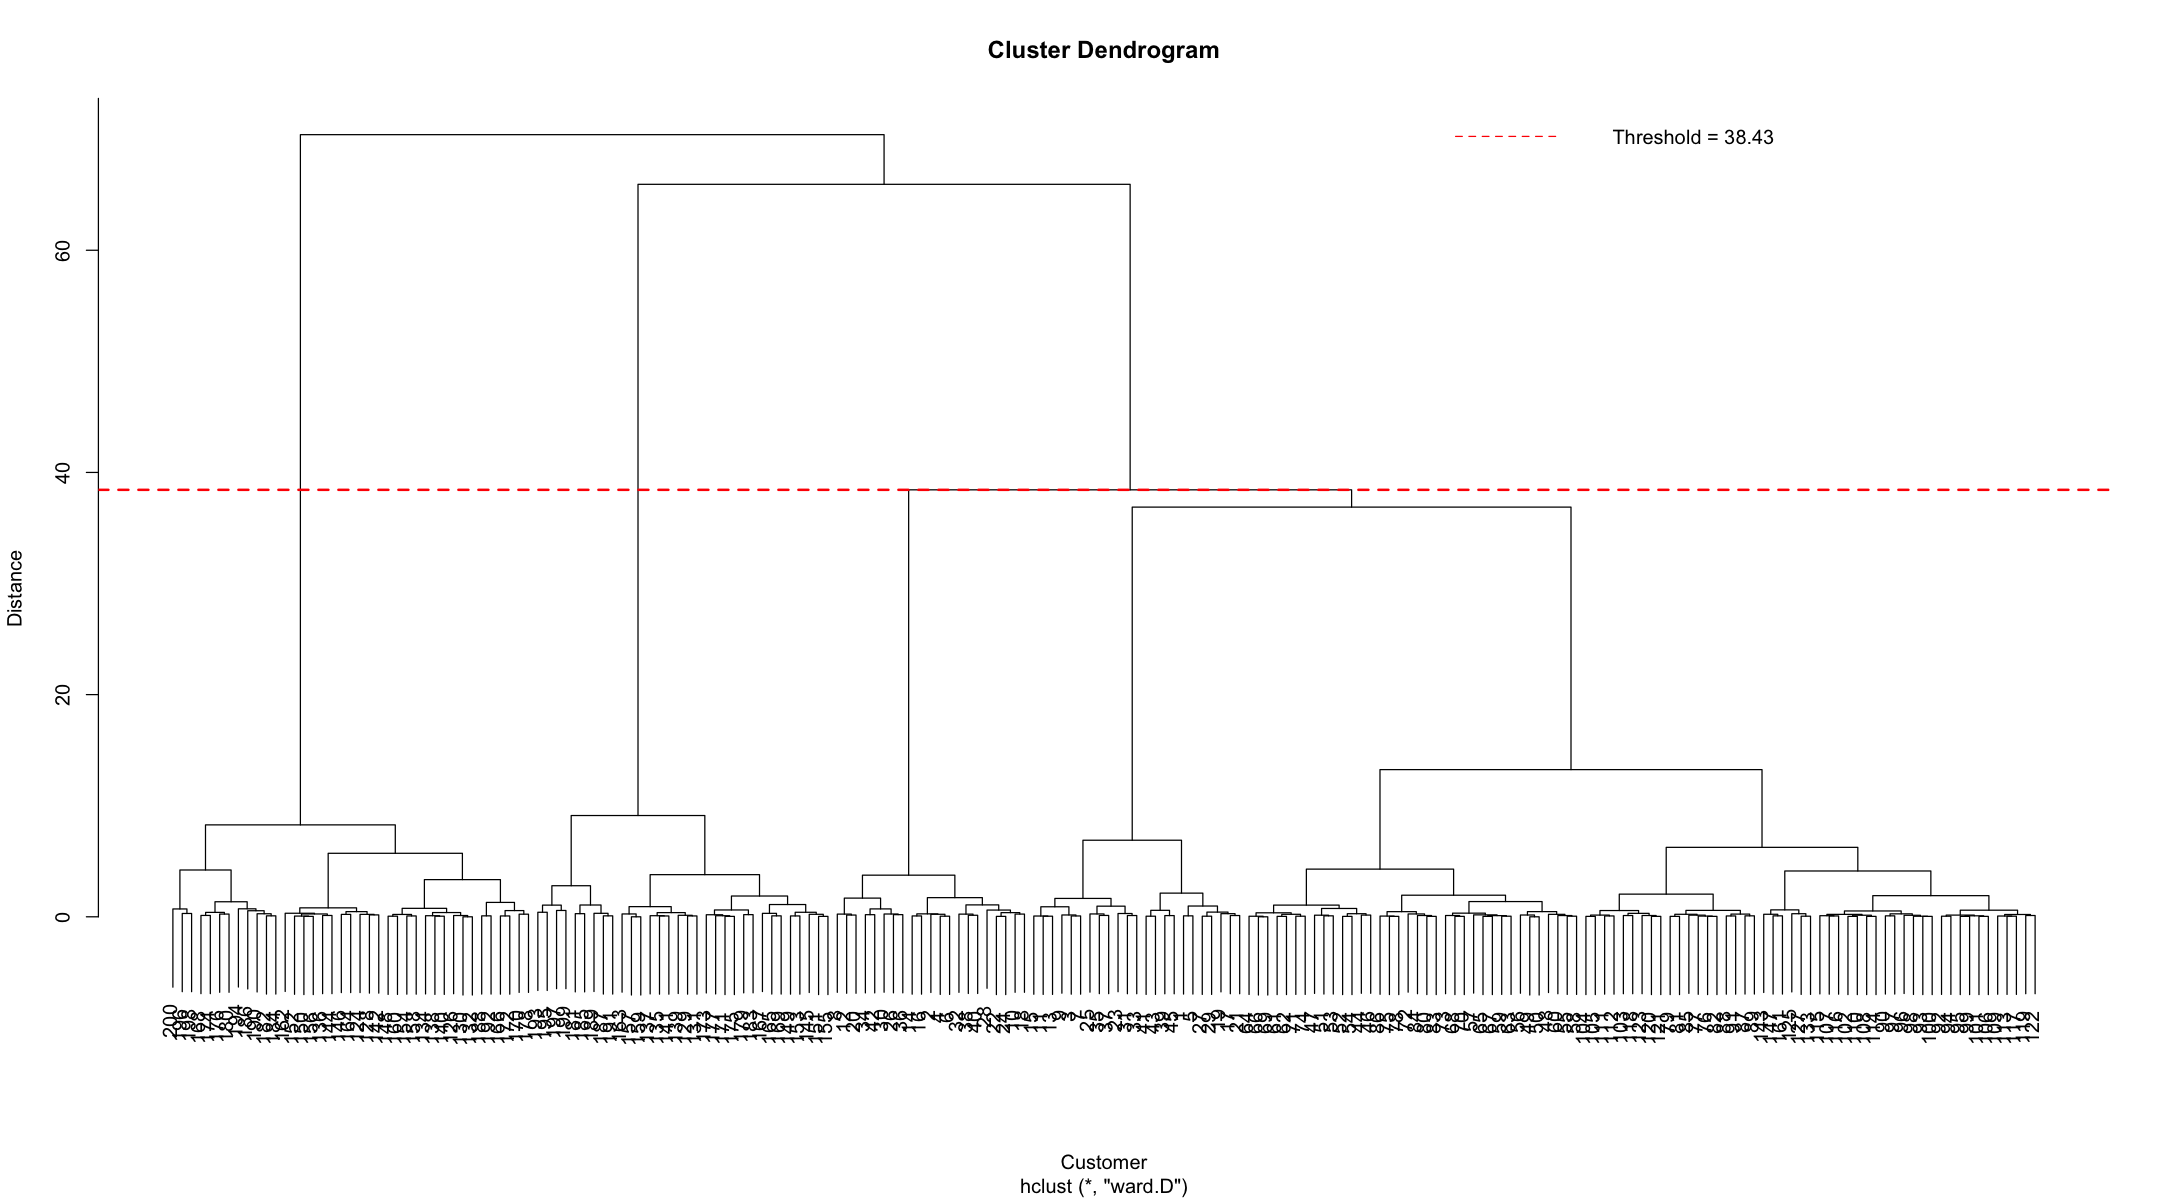

In [7]:
# Extract distances and find the largest jump
# Compute the heights of merges
distances <- clust$height

# Find the largest jump in distances
jumps <- diff(distances)
largest_jump_index <- which.max(jumps)
threshold <- distances[largest_jump_index] # Threshold for optimal clustering

# Create flat clusters
clusters <- cutree(clust, h = threshold)

# Display results
cat("Optimal threshold:", threshold, "\n")
cat("Cluster assignments:", clusters, "\n")

# Plot the dendrogram
plot(clust, labels = NULL, hang = 0.1, check = TRUE,
     axes = TRUE, frame.plot = FALSE, ann = TRUE,
     main = "Cluster Dendrogram",
     sub = NULL, xlab = "Customer", ylab = "Distance")
abline(h = threshold, col = "red", lty = 2, lwd = 2) # Add threshold line
legend("topright", legend = sprintf("Threshold = %.2f", threshold), col = "red", lty = 2, bty = "n")

## Viz the clusters

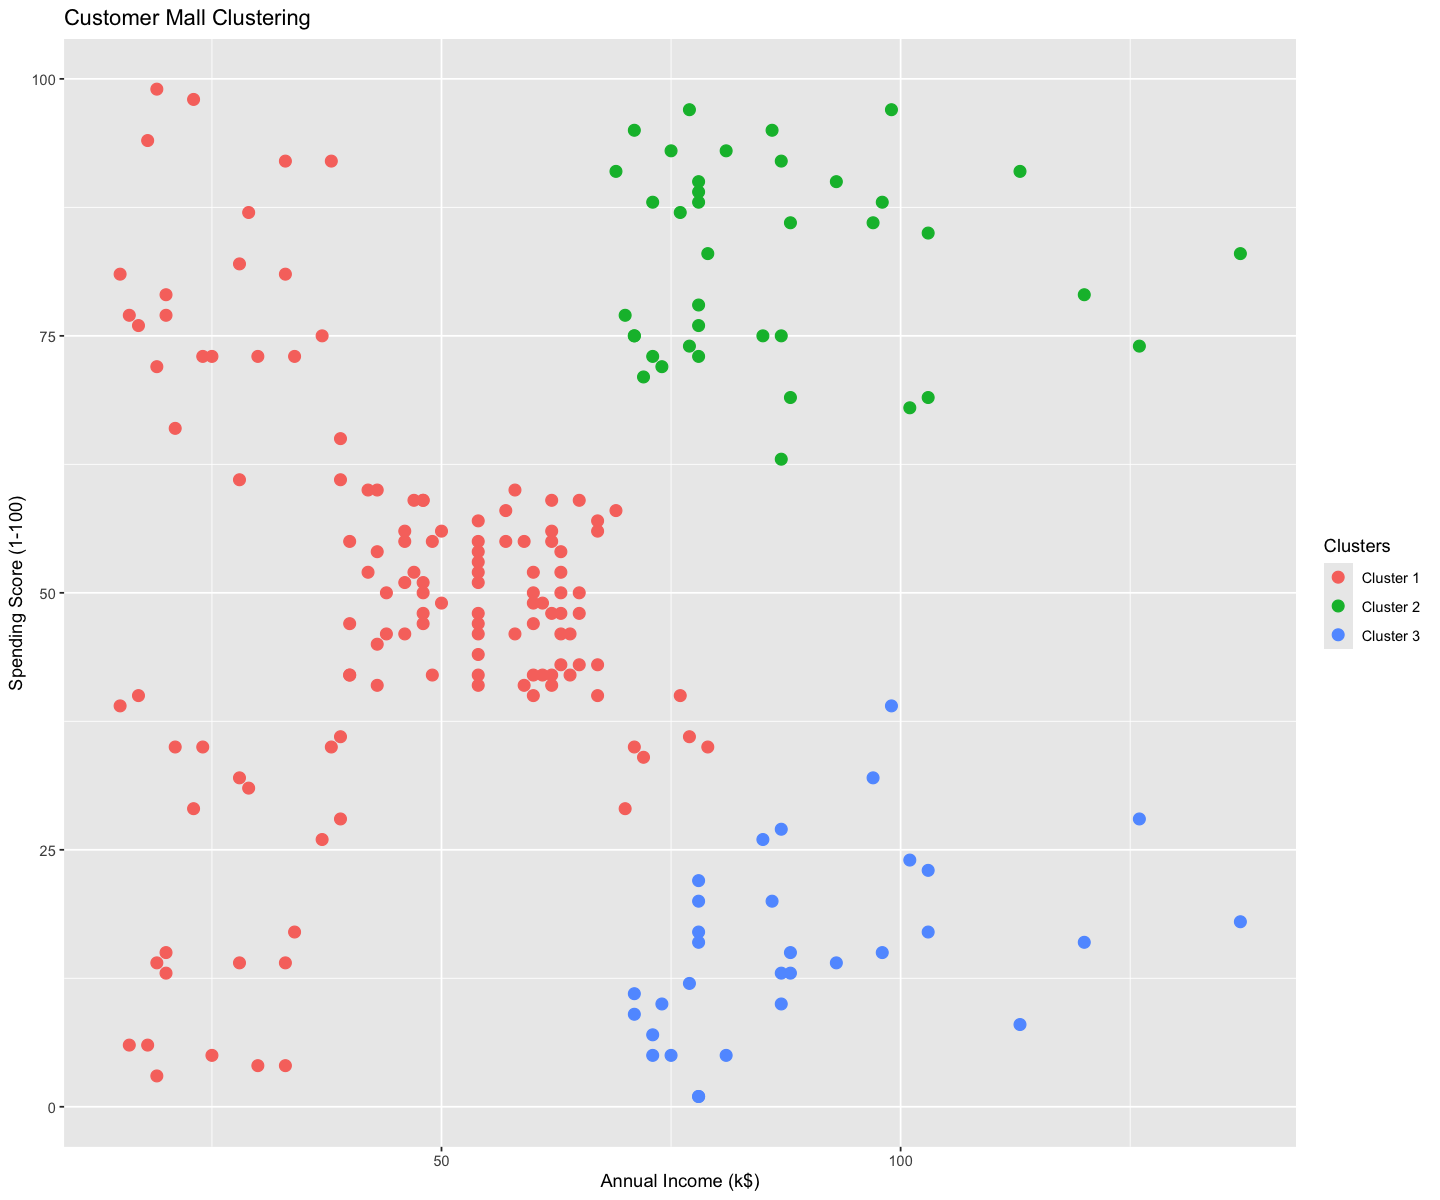

In [8]:
df <- X
df$Cluster <- clusters

options(repr.plot.width=12, repr.plot.height=10)

df |>
ggplot() +
    geom_point(aes(x = `Annual Income (k$)`,
                   y = `Spending Score (1-100)`, 
                   colour = paste0('Cluster ', factor(Cluster))), size = 3) +
    labs(title = 'Customer Mall Clustering', x = 'Annual Income (k$)',
         y = 'Spending Score (1-100)', color = 'Clusters')

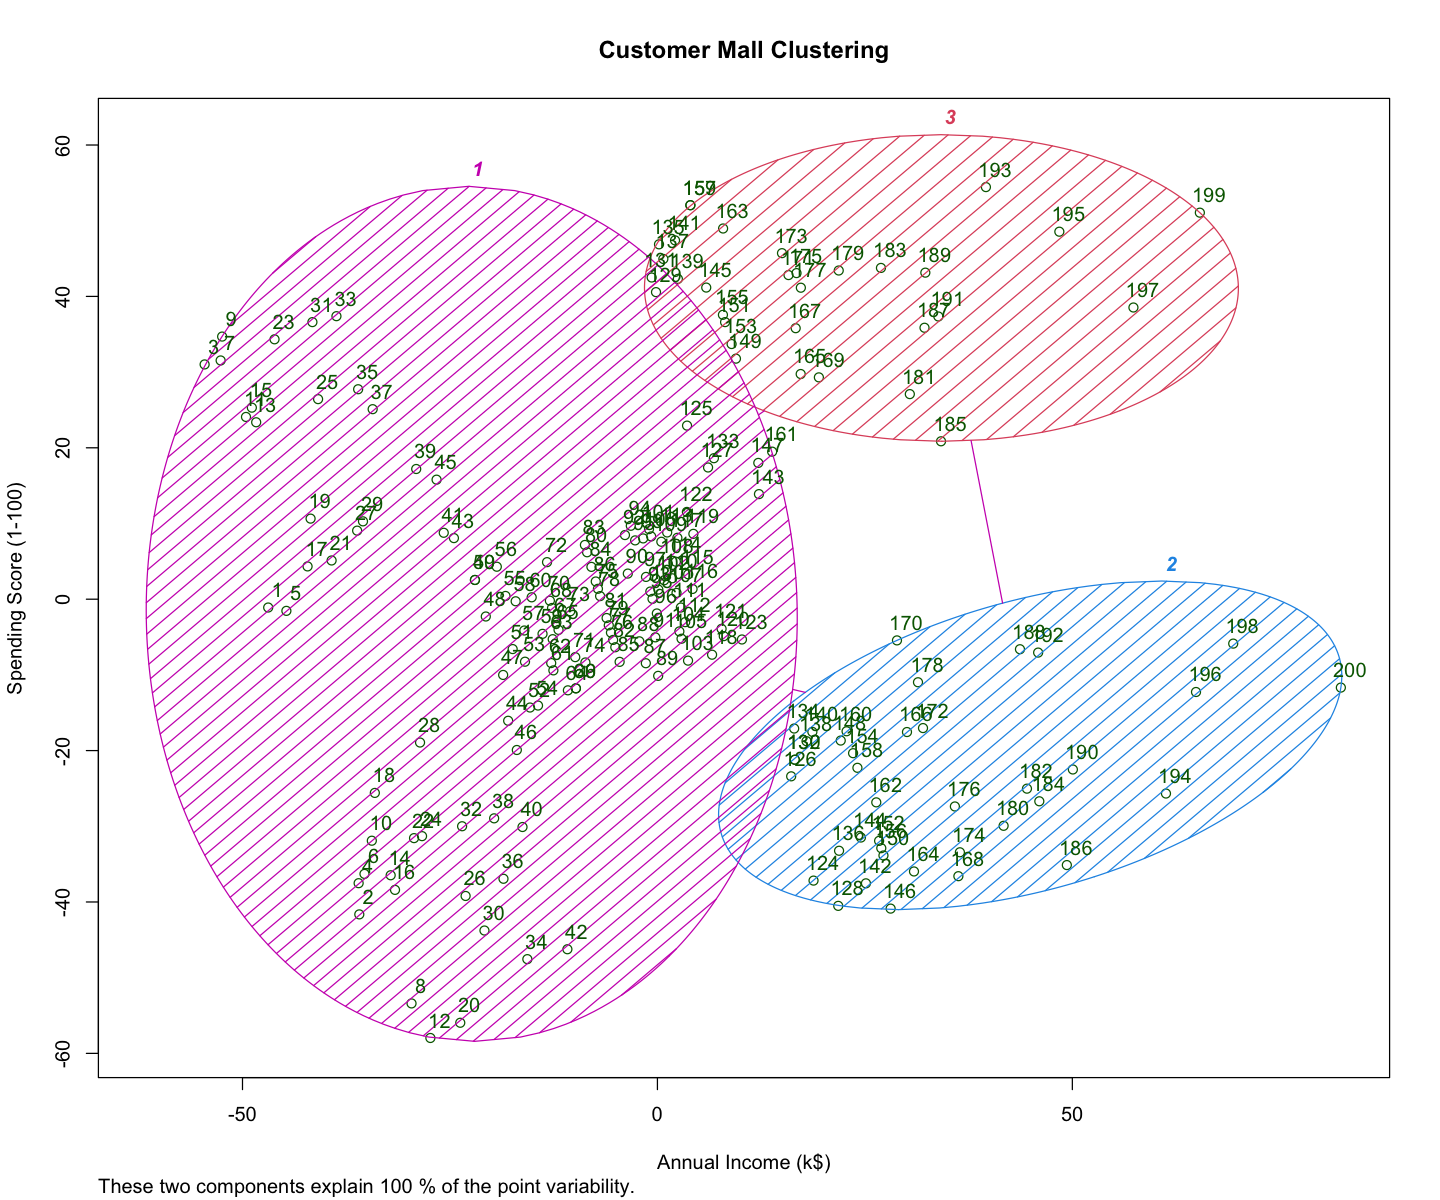

In [9]:
clusplot(X,
        clusters,
        shade = TRUE,
        color = TRUE,
        labels = 2,
        plotchar = FALSE,
        span = TRUE,
        main = paste('Customer Mall Clustering'),
        xlab = 'Annual Income (k$)',
        ylab = 'Spending Score (1-100)')

## Viz for 5 clusters

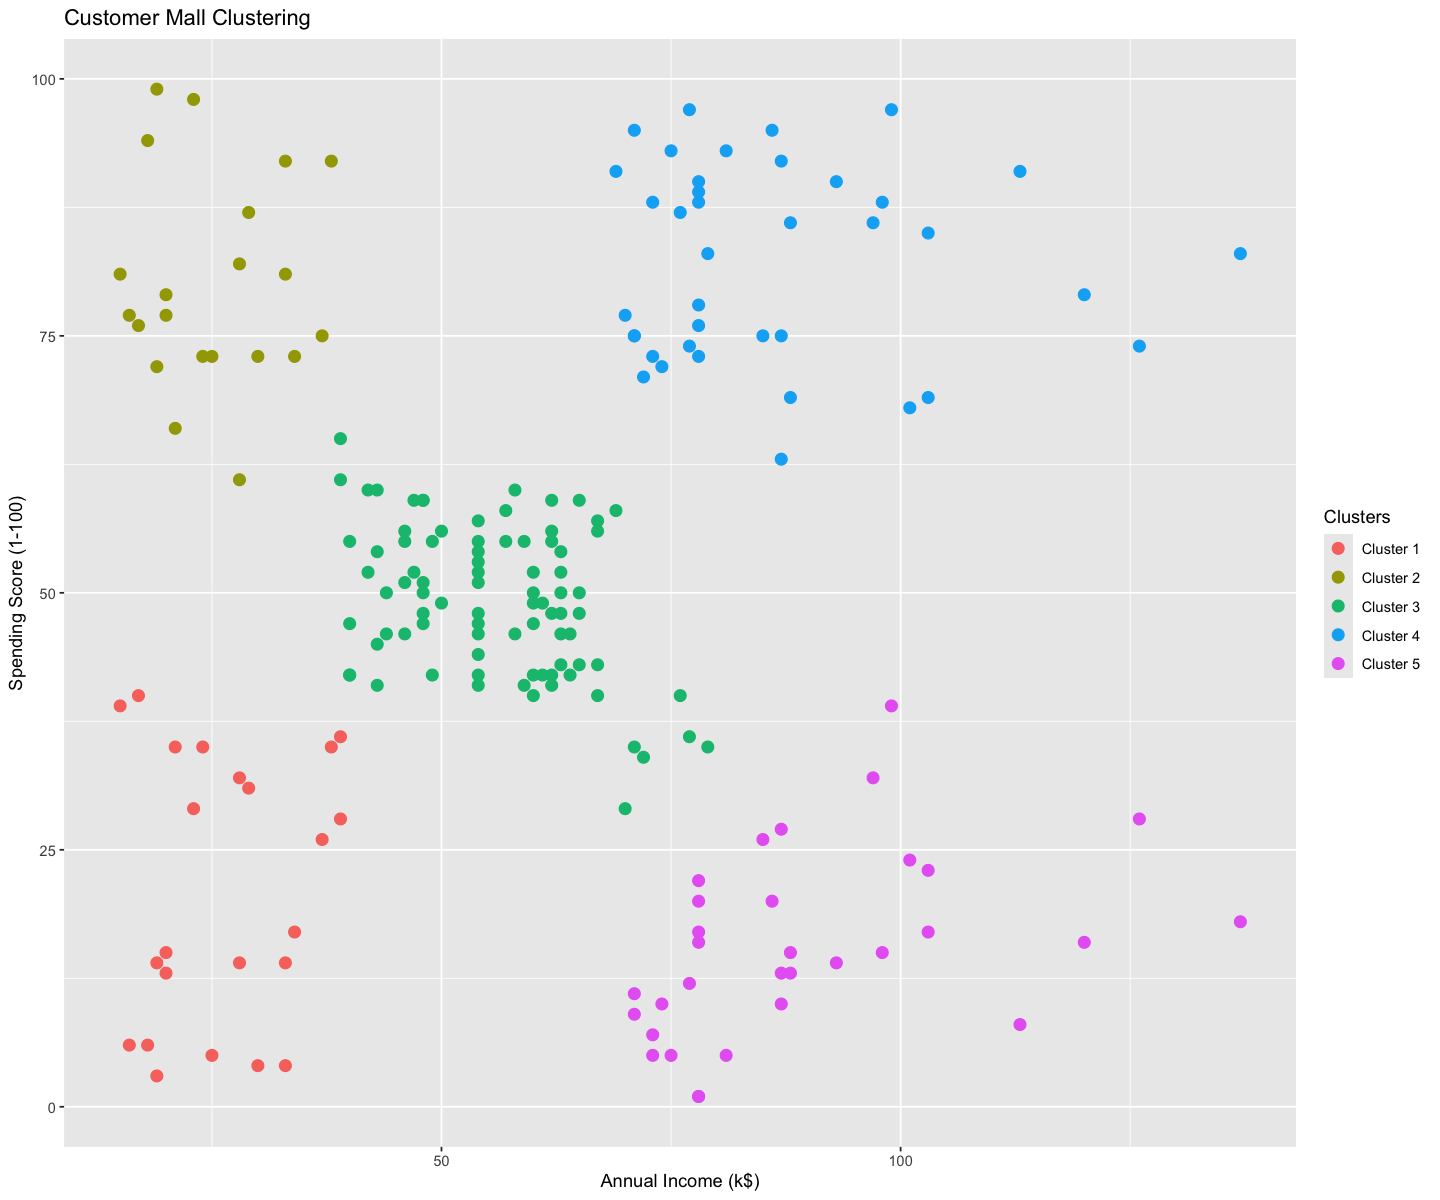

In [10]:
df <- X
# Create flat clusters
df$Cluster <- cutree(clust, 5)

df |>
ggplot() +
    geom_point(aes(x = `Annual Income (k$)`, y = `Spending Score (1-100)`, 
                   colour = paste0('Cluster ', factor(Cluster))), size = 3) +
    labs(title = 'Customer Mall Clustering', x = 'Annual Income (k$)',
         y = 'Spending Score (1-100)', color = 'Clusters')

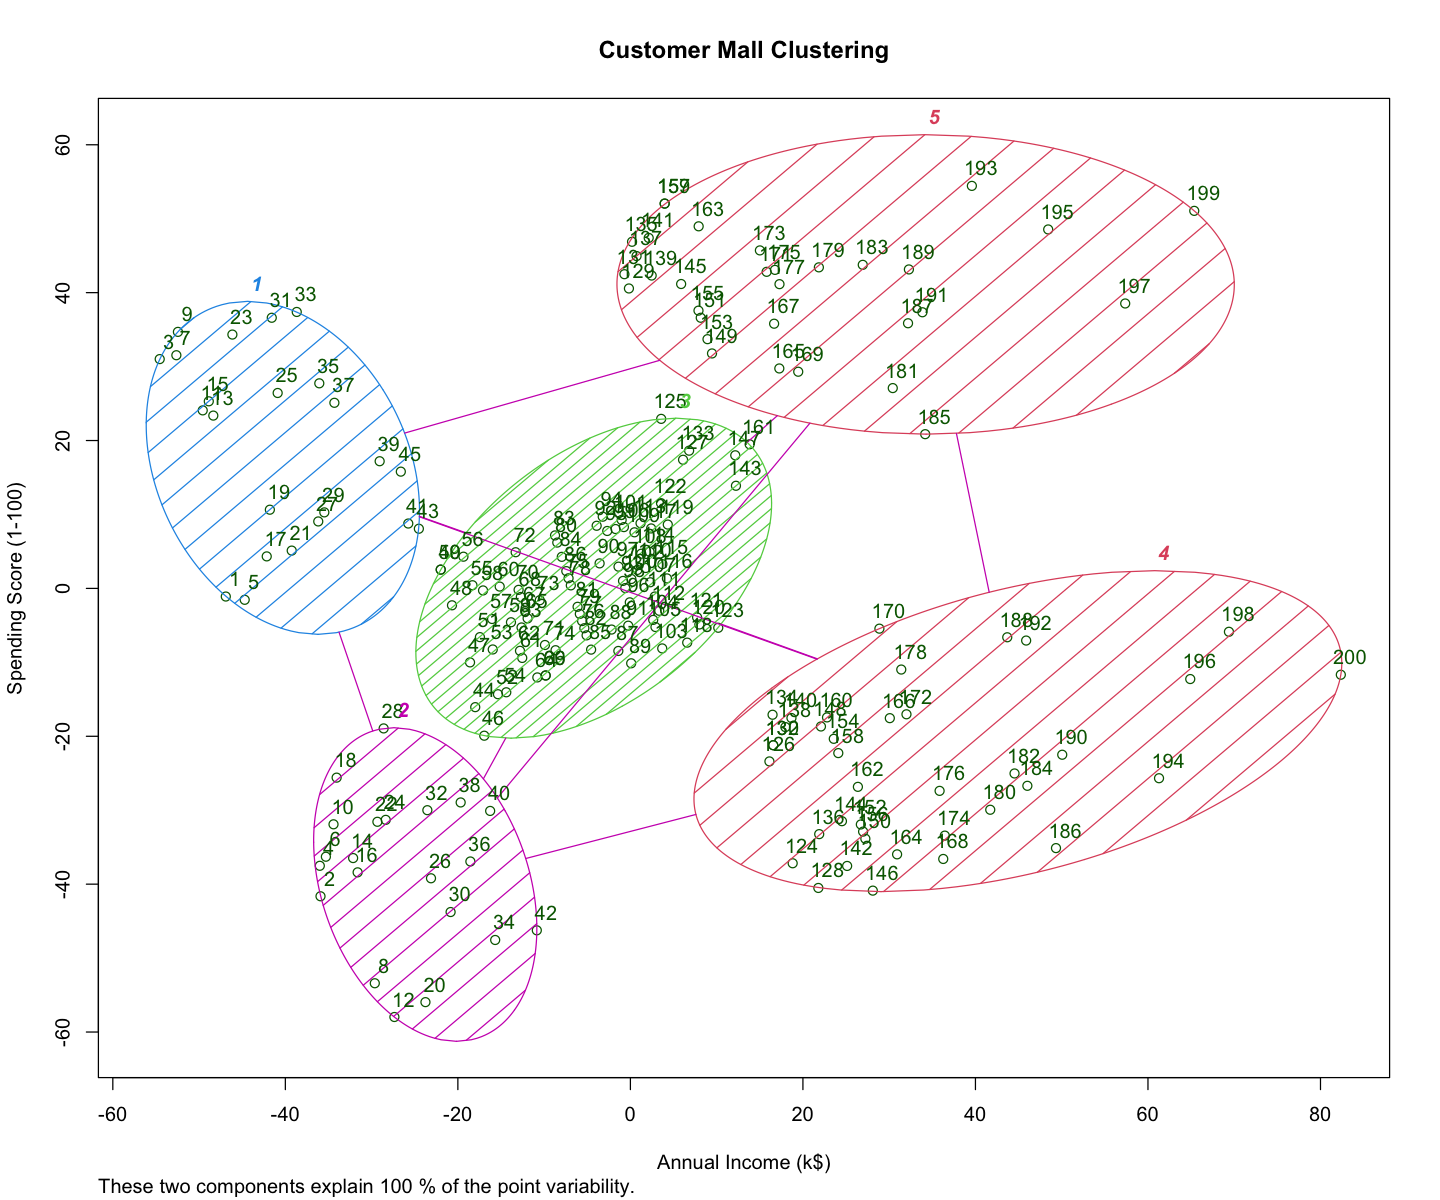

In [11]:
clusplot(X,
        df$Cluster,
        shade = TRUE,
        color = TRUE,
        labels = 2,
        plotchar = FALSE,
        span = TRUE,
        main = paste('Customer Mall Clustering'),
        xlab = 'Annual Income (k$)',
        ylab = 'Spending Score (1-100)')